# **Number recognition**

### Present a poorly performing solution and then improve it to a well performing one

# The first, poorly performing solution

- Load the MNIST dataset
- Split training data into training and validation
- build the model
- compile the model
- train the model
- evaulate the model
- load the image for prediction
  - (resize it to 28x28 pixel)
  - normalize
- make the prediction

### Global vars and imports

In [63]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from skimage.feature import hog
from PIL import Image
import cv2

pixel_h = 28
pixel_w = 28
IMAGE_TO_LOAD = "number.jpg"
VALIDATION_SPLIT = 0.2

### Load the MNIST dataset

In [64]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

### Visualize the data

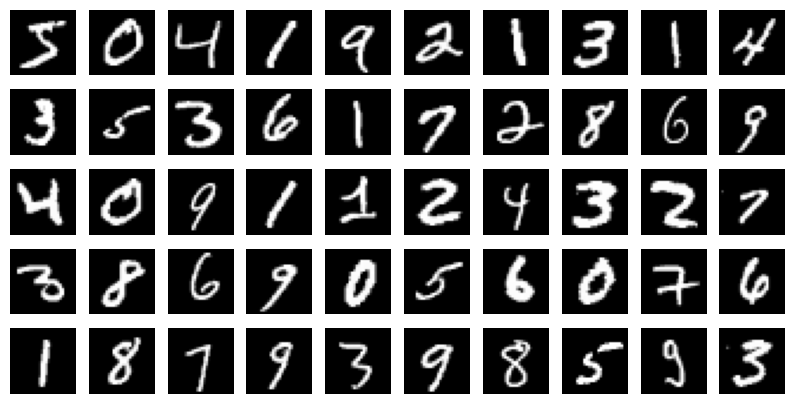

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [65]:
col = 10
row = 5
plt.figure(figsize=(col, row))

for i in range(col * row):
    plt.subplot(row, col, i+1)
    plt.axis('off')
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')

plt.show()

display(x_train)

# Check how balanced the training and test data sets are

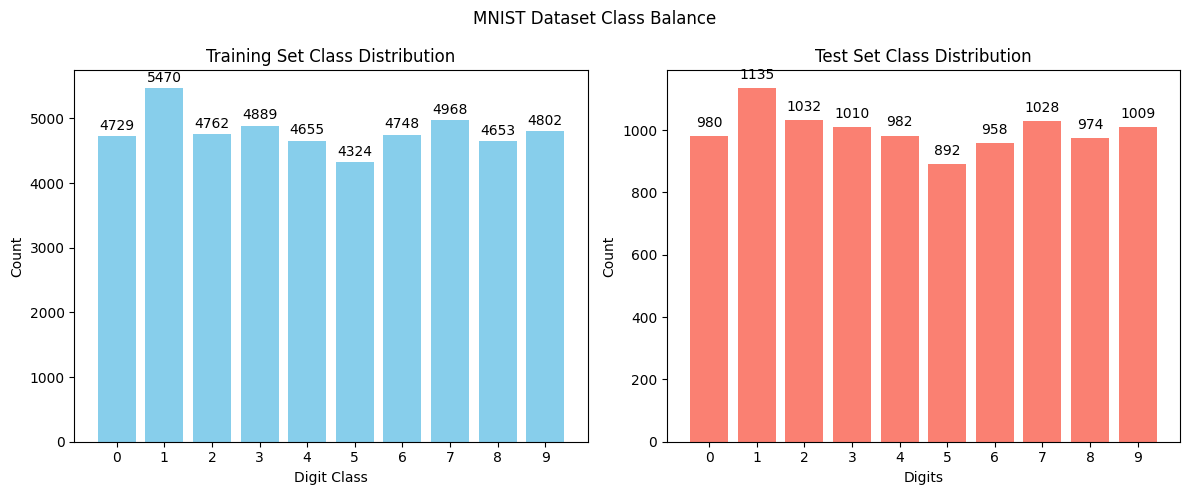

In [48]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
train_counts = np.bincount(y_train)
plt.bar(range(10), train_counts, color='skyblue')
plt.title('Training Set Class Distribution')
plt.xlabel('Digit Class')
plt.ylabel('Count')
plt.xticks(range(10))

for i, count in enumerate(train_counts):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.subplot(1, 2, 2)
test_counts = np.bincount(y_test)
plt.bar(range(10), test_counts, color='salmon')
plt.title('Test Set Class Distribution')
plt.xlabel('Digits')
plt.ylabel('Count')
plt.xticks(range(10))

for i, count in enumerate(test_counts):
    plt.text(i, count + 20, str(count), ha='center', va='bottom')

plt.suptitle('MNIST Dataset Class Balance')
plt.tight_layout()
plt.show()

### Normalization

In [66]:
x_train, x_test = x_train / 255.0, x_test / 255.0

### Split training data into training & validation sets

In [67]:
split_idx = int(len(x_train) * (1 - VALIDATION_SPLIT))
x_train, x_val = x_train[:split_idx], x_train[split_idx:]
y_train, y_val = y_train[:split_idx], y_train[split_idx:]

### Build the model

In [68]:
model = Sequential([
   Conv2D(256, kernel_size=(3,3), activation='relu', input_shape=(pixel_h, pixel_w, 1)),
   MaxPooling2D(pool_size=(2, 2)),
   Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(pixel_h, pixel_w, 1)),
   MaxPooling2D(pool_size=(2, 2)),
   Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(pixel_h, pixel_w, 1)),
   MaxPooling2D(pool_size=(2, 2)),
   Flatten(),
   Dropout(0.1),
   Dense(10, activation='softmax')
])

model.summary()

/Users/kalman/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 256)    │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_55 (Flatten)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 372,042 (1.42 MB)

 Trainable params: 372,042 (1.42 MB)

 Non-trainable params: 0 (0.00 B)

### Compile the model

In [69]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Train the model

In [70]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.8558 - loss: 0.4377 - val_accuracy: 0.9774 - val_loss: 0.0714
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - accuracy: 0.9769 - loss: 0.0773 - val_accuracy: 0.9822 - val_loss: 0.0605
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 34ms/step - accuracy: 0.9821 - loss: 0.0581 - val_accuracy: 0.9852 - val_loss: 0.0489
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 35ms/step - accuracy: 0.9873 - loss: 0.0423 - val_accuracy: 0.9873 - val_loss: 0.0466
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 70s 47ms/step - accuracy: 0.9894 - loss: 0.0305 - val_accuracy: 0.9870 - val_loss: 0.0454
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 91s 60ms/step - accuracy: 0.9921 - loss: 0.0247 - val_accuracy: 0.9852 - val_loss: 0.0542
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 57ms/step - accuracy: 0.9904 - loss: 0.0283 - val_accuracy: 0.9873 - val_loss: 0.0485
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 86s 58ms/step - accuracy: 0.9936 -

### Evaulate the model

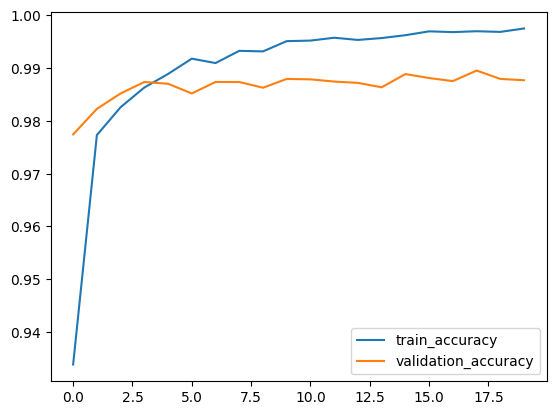

In [71]:
history=model.history
plt.plot(history.history['accuracy'],label='train_accuracy')

plt.plot(history.history['val_accuracy'],label='validation_accuracy')
plt.legend()

### Load the image for prediction (reshape and normalize)

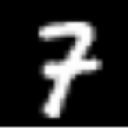

In [72]:
img = keras.preprocessing.image.load_img(IMAGE_TO_LOAD, target_size=(28, 28), color_mode="grayscale")
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.keras.utils.normalize(img_array, axis=1)

display(keras.preprocessing.image.load_img(IMAGE_TO_LOAD, target_size=(128, 128), color_mode="grayscale"))

### Make the prediction

In [73]:
prediction = model.predict(img_array.reshape(1, 28, 28), verbose=0)
print(f"Prediction: {prediction.argmax()}")

Prediction: 7


### Test and evaulate the model on **real test data**
- The real test data is created as follow:
  - Write the digits with a pen on a white paper
  - Take a picture from the paper
  - Cut each image digitally and save them as 0.png, 1.png, etc.

- The original image where the digits were extracted:
![Alt text](readme_resources/handwritten_digits.jpeg)

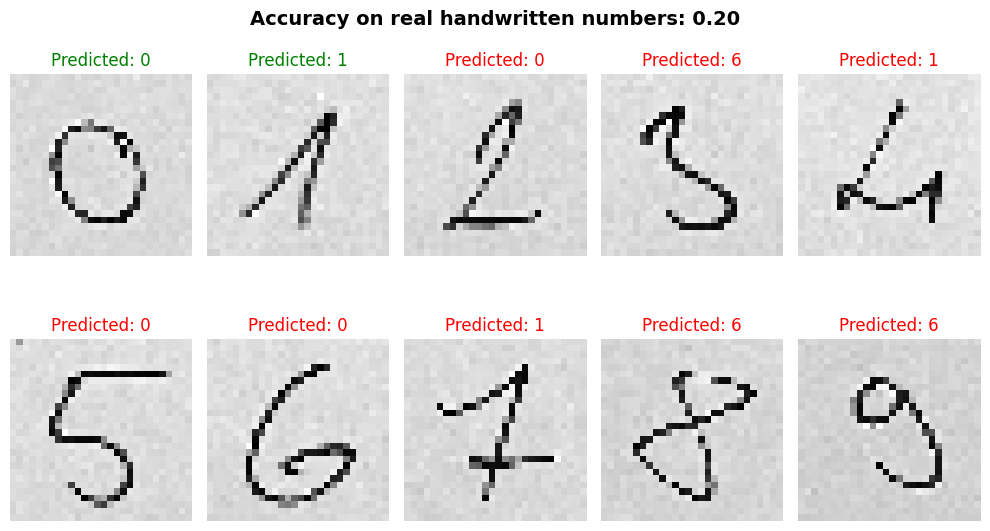

In [74]:
num_of_correct = 0
plt.figure(figsize=(10, 6))

for i in range(10):
    img = keras.preprocessing.image.load_img(f'test_numbers_real/{i}.png', target_size=(28, 28), color_mode="grayscale")
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.keras.utils.normalize(img_array, axis=1)
    
    prediction = model.predict(img_array.reshape(1, 28, 28), verbose=0)
    predicted_num = prediction.argmax()
    
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    status_color = 'green' if i == predicted_num else 'red'
    plt.title(f"Predicted: {predicted_num}", color=f'{status_color}')
    plt.axis('off')
    
    if i == predicted_num:
        num_of_correct += 1

plt.tight_layout()
plt.suptitle(f'Accuracy on real handwritten numbers: {num_of_correct / 10:.2f}', fontsize=14, fontweight='bold')
plt.show()

### Test and evaulate the model on handwritten digits on **MNIST test data**

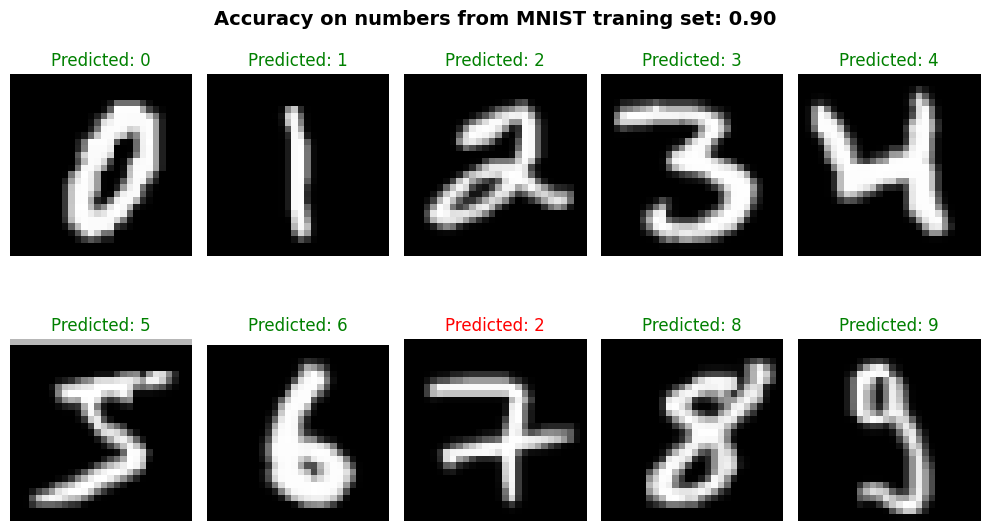

In [75]:
num_of_correct = 0
plt.figure(figsize=(10, 6))

for i in range(10):
    img = keras.preprocessing.image.load_img(f'test_numbers_mnist/{i}.png', target_size=(28, 28), color_mode="grayscale")
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.keras.utils.normalize(img_array, axis=1)
    
    prediction = model.predict(img_array.reshape(1, 28, 28), verbose=0)
    predicted_num = prediction.argmax()
    
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    status_color = 'green' if i == predicted_num else 'red'
    plt.title(f"Predicted: {predicted_num}", color=f'{status_color}')
    plt.axis('off')
    
    if i == predicted_num:
        num_of_correct += 1

plt.tight_layout()
plt.suptitle(f'Accuracy on numbers from MNIST traning set: {num_of_correct / 10:.2f}', fontsize=14, fontweight='bold')
plt.show()

## **The model performs much better on the MNIST data then on real data**

> It can be assumed that the model is overfitted during the training

### Calculate and plot the confusion matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


<Figure size 1000x800 with 0 Axes>

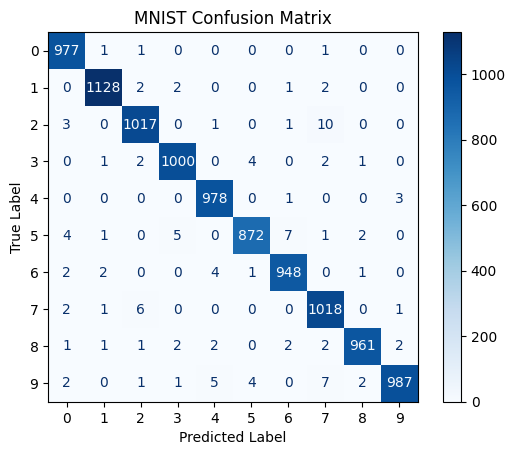

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("MNIST Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.grid(False)
plt.show()

# Now let's improve the solution



- Check if the training data is balanced
- Confusion matrix 
- Change the model architecture
- FIx this problem: the training data is with only black background and white digits
  - grayescale the input image (it is already grayscaled)
  - preprocessing the input image before prediction
- Label encoding
- Handle overfitting:
  - Simplify the model
  - Don't do too much epochs
  - Data augmentation
  - Using dropout layer
- Using HOG feautes

# Simplify model architecture

In [77]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

/Users/kalman/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_56 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# Invert the input image to match with MNIST data
> Since MNIST data are with black background with white digits and the input image (image to predict) have white bg and darker fg
# reduce the number of epochs
# use validation data during training
# use batches
# shuffle the training data before each epoch

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8984 - loss: 0.3323 - val_accuracy: 0.9817 - val_loss: 0.0622
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9831 - loss: 0.0530 - val_accuracy: 0.9835 - val_loss: 0.0511
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9900 - loss: 0.0313 - val_accuracy: 0.9894 - val_loss: 0.0361
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9939 - loss: 0.0201 - val_accuracy: 0.9894 - val_loss: 0.0340
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9952 - loss: 0.0161 - val_accuracy: 0.9880 - val_loss: 0.0407


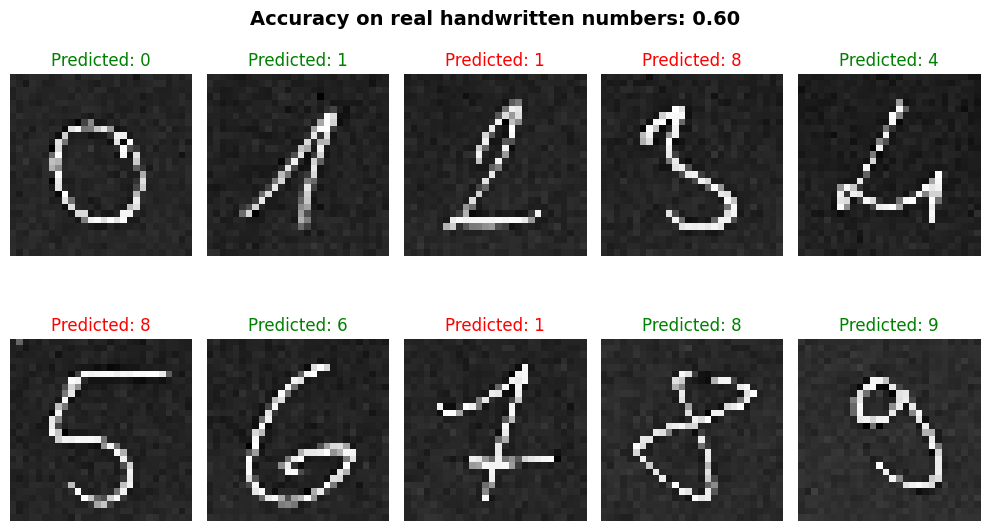

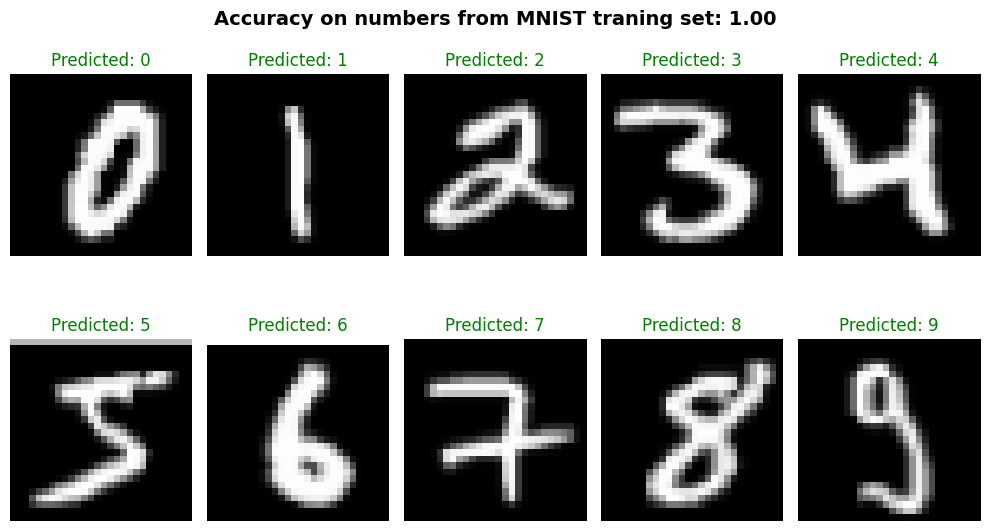

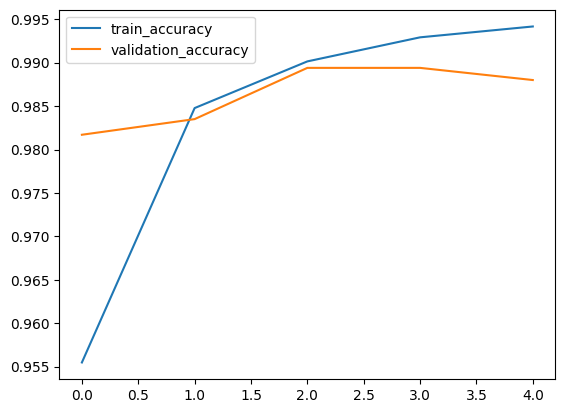

In [78]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32,shuffle=True,epochs=5)

num_of_correct = 0
plt.figure(figsize=(10, 6))

# Test with real test data
for i in range(10):
    img = Image.fromarray(np.invert(keras.preprocessing.image.load_img(f'test_numbers_real/{i}.png', target_size=(28, 28), color_mode="grayscale")))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.keras.utils.normalize(img_array, axis=1)
    
    prediction = model.predict(img_array.reshape(1, 28, 28), verbose=0)
    predicted_num = prediction.argmax()
    
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    status_color = 'green' if i == predicted_num else 'red'
    plt.title(f"Predicted: {predicted_num}", color=f'{status_color}')
    plt.axis('off')
    
    if i == predicted_num:
        num_of_correct += 1

plt.tight_layout()
plt.suptitle(f'Accuracy on real handwritten numbers: {num_of_correct / 10:.2f}', fontsize=14, fontweight='bold')
plt.show()

# Test with MNIST test data
num_of_correct = 0
plt.figure(figsize=(10, 6))

for i in range(10):
    img = keras.preprocessing.image.load_img(f'test_numbers_mnist/{i}.png', target_size=(28, 28), color_mode="grayscale")
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.keras.utils.normalize(img_array, axis=1)
    
    prediction = model.predict(img_array.reshape(1, 28, 28), verbose=0)
    predicted_num = prediction.argmax()
    
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    status_color = 'green' if i == predicted_num else 'red'
    plt.title(f"Predicted: {predicted_num}", color=f'{status_color}')
    plt.axis('off')
    
    if i == predicted_num:
        num_of_correct += 1

plt.tight_layout()
plt.suptitle(f'Accuracy on numbers from MNIST traning set: {num_of_correct / 10:.2f}', fontsize=14, fontweight='bold')
plt.show()

history=model.history
plt.plot(history.history['accuracy'],label='train_accuracy')

plt.plot(history.history['val_accuracy'],label='validation_accuracy')
plt.legend()

# Input image preprocessing

In [79]:
# Transform the input image to be similar to MNIST data (black bg, quite bold white digits)
def transform_digit_to_mnist_like(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Reduce noise while preserving edges
    filtered = cv2.bilateralFilter(img, 9, 75, 75)
    
    # Adaptive thresholding
    thresh = cv2.adaptiveThreshold(filtered, 255, 
                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY, 15, 15)
    
    # Morphological operations to clean background
    kernel = np.ones((4,4), np.uint8)
    img_t = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=5)
    
    # Resize and invert colors to 28x28
    img_t = 255 - cv2.resize(img_t, (28, 28), interpolation=cv2.INTER_AREA)
    
    return img_t

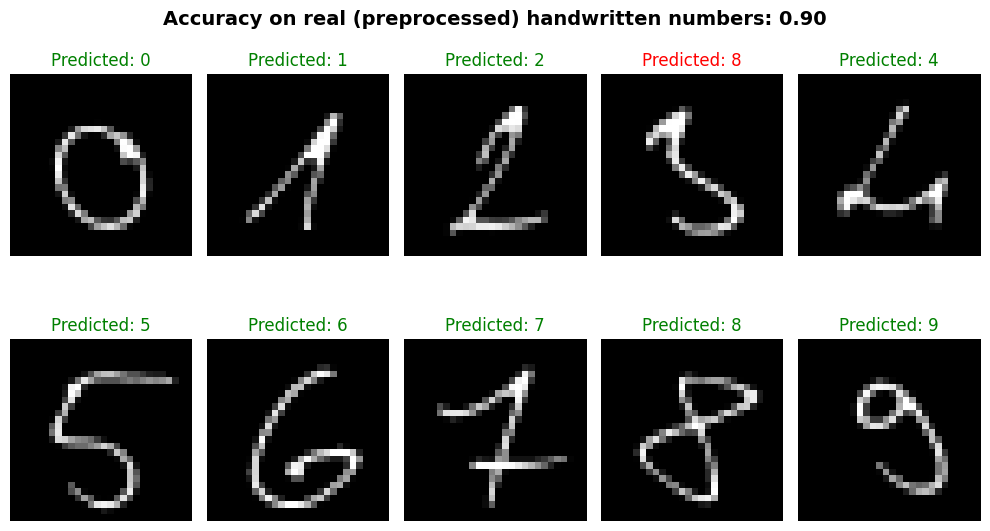

In [80]:
# Test with real test data (after preprocessing the image)

num_of_correct = 0
plt.figure(figsize=(10, 6))

for i in range(10):
    img = transform_digit_to_mnist_like(f'test_numbers_real/{i}.png') 
    prediction = model.predict(img.reshape(1, 28, 28), verbose=0)
    predicted_num = prediction.argmax()
    
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    status_color = 'green' if i == predicted_num else 'red'
    plt.title(f"Predicted: {predicted_num}", color=f'{status_color}')
    plt.axis('off')
    
    if i == predicted_num:
        num_of_correct += 1

plt.tight_layout()
plt.suptitle(f'Accuracy on real (preprocessed) handwritten numbers: {num_of_correct / 10:.2f}', fontsize=14, fontweight='bold')
plt.show()

# Add one-hot encoded labels

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9018 - loss: 0.3170 - val_accuracy: 0.9789 - val_loss: 0.0633
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9835 - loss: 0.0513 - val_accuracy: 0.9892 - val_loss: 0.0357
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9905 - loss: 0.0303 - val_accuracy: 0.9862 - val_loss: 0.0419
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9923 - loss: 0.0226 - val_accuracy: 0.9890 - val_loss: 0.0359
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9954 - loss: 0.0148 - val_accuracy: 0.9874 - val_loss: 0.0397
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9963 - loss: 0.0119 - val_accuracy: 0.9909 - val_loss: 0.0283
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9966 - loss: 0.0099 - val_accuracy: 0.9885 - val_loss: 0.0411
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9973 - loss: 0.0087 - 

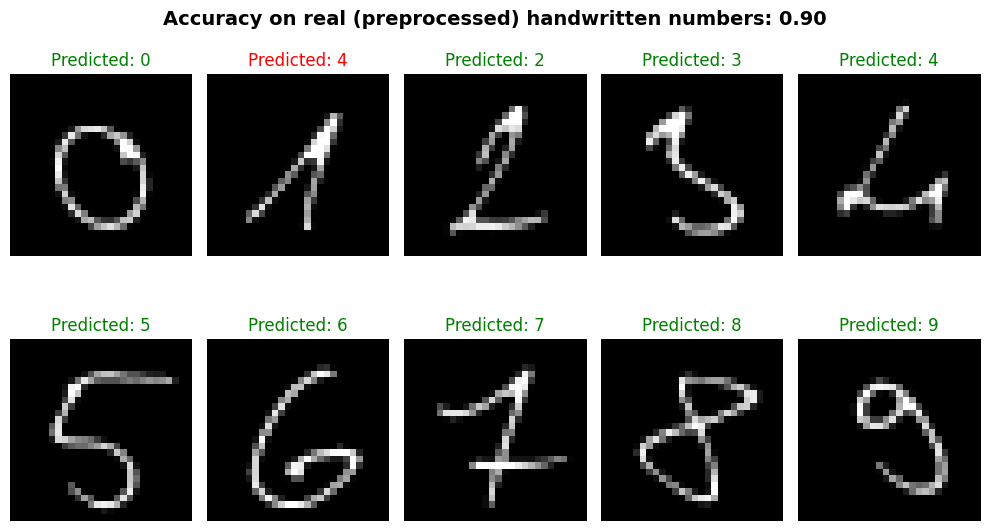

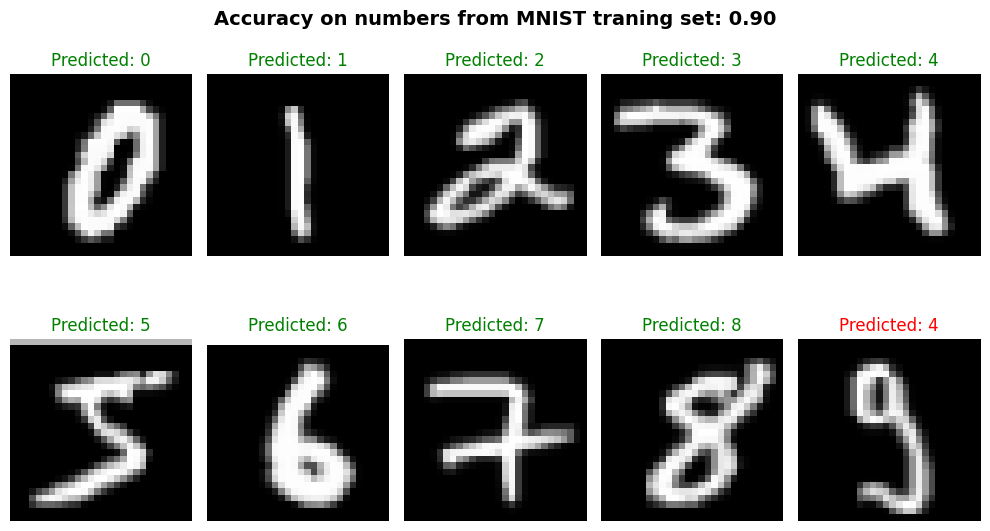

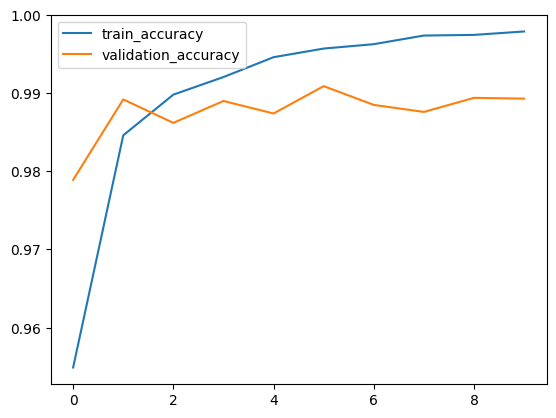

In [81]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize and reshape
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

split_idx = int(len(x_train) * (1 - VALIDATION_SPLIT))
x_train, x_val = x_train[:split_idx], x_train[split_idx:]
y_train, y_val = y_train[:split_idx], y_train[split_idx:]

model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # loss is UPDATED compare to prior due to one-hot encoded labels
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32,shuffle=True,epochs=10) # epochs are UPDATED from 5 to 10 due to one-hot encoded labels

num_of_correct = 0
plt.figure(figsize=(10, 6))

# Test with real test data (after preprocessing the image)
for i in range(10):
    img = transform_digit_to_mnist_like(f'test_numbers_real/{i}.png') 
    prediction = model.predict(img.reshape(1, 28, 28), verbose=0)
    predicted_num = prediction.argmax()
    
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    status_color = 'green' if i == predicted_num else 'red'
    plt.title(f"Predicted: {predicted_num}", color=f'{status_color}')
    plt.axis('off')
    
    if i == predicted_num:
        num_of_correct += 1

plt.tight_layout()
plt.suptitle(f'Accuracy on real (preprocessed) handwritten numbers: {num_of_correct / 10:.2f}', fontsize=14, fontweight='bold')
plt.show()

# Test with MNIST test data
num_of_correct = 0
plt.figure(figsize=(10, 6))

for i in range(10):
    img = keras.preprocessing.image.load_img(f'test_numbers_mnist/{i}.png', target_size=(28, 28), color_mode="grayscale")
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.keras.utils.normalize(img_array, axis=1)
    
    prediction = model.predict(img_array.reshape(1, 28, 28), verbose=0)
    predicted_num = prediction.argmax()
    
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    status_color = 'green' if i == predicted_num else 'red'
    plt.title(f"Predicted: {predicted_num}", color=f'{status_color}')
    plt.axis('off')
    
    if i == predicted_num:
        num_of_correct += 1

plt.tight_layout()
plt.suptitle(f'Accuracy on numbers from MNIST traning set: {num_of_correct / 10:.2f}', fontsize=14, fontweight='bold')
plt.show()

history=model.history
plt.plot(history.history['accuracy'],label='train_accuracy')

plt.plot(history.history['val_accuracy'],label='validation_accuracy')
plt.legend()

# Data augmentation

Epoch 1/10


/Users/kalman/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7251 - loss: 0.8099 - val_accuracy: 0.9744 - val_loss: 0.0881
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9478 - loss: 0.1704 - val_accuracy: 0.9807 - val_loss: 0.0580
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9630 - loss: 0.1185 - val_accuracy: 0.9823 - val_loss: 0.0565
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9690 - loss: 0.0984 - val_accuracy: 0.9855 - val_loss: 0.0433
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9757 - loss: 0.0774 - val_accuracy: 0.9888 - val_loss: 0.0367
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9763 - loss: 0.0739 - val_accuracy: 0.9890 - val_loss: 0.0317
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9784 - loss: 0.0642 - val_accuracy: 0.9902 - val_loss: 0.0293
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9800 - loss: 0.0645 - val_accuracy: 0.9899 - val_

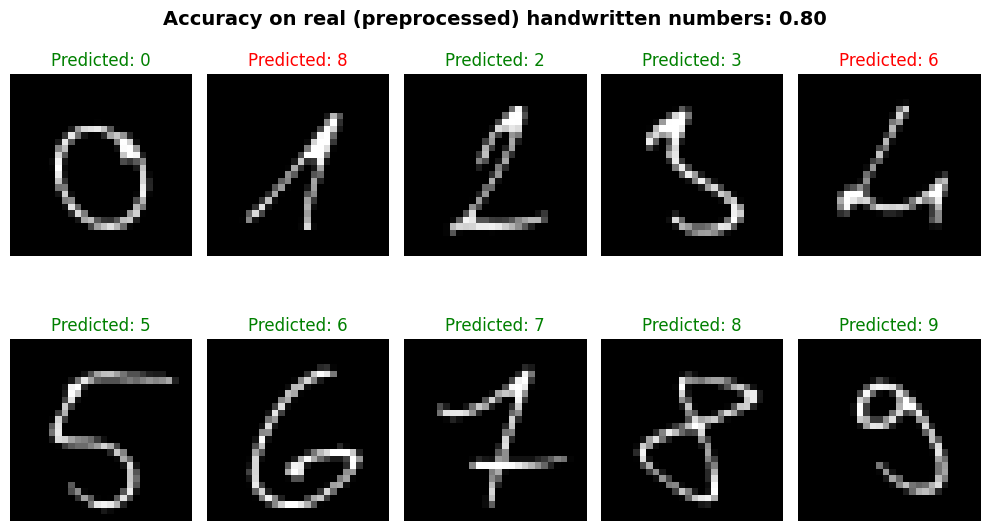

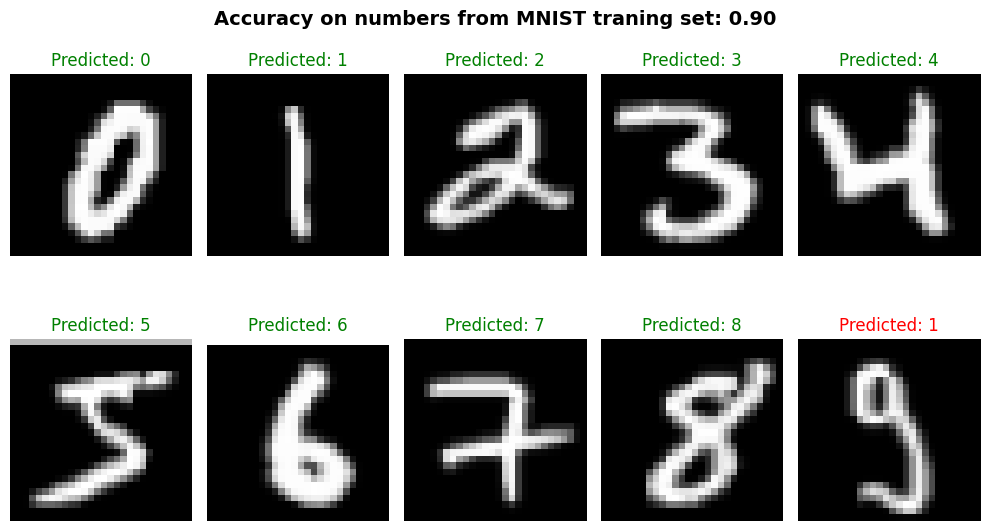

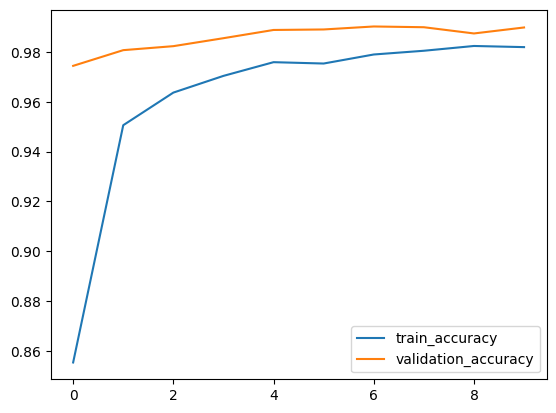

In [82]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize and reshape
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

split_idx = int(len(x_train) * (1 - VALIDATION_SPLIT))
x_train, x_val = x_train[:split_idx], x_train[split_idx:]
y_train, y_val = y_train[:split_idx], y_train[split_idx:]

model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Generate transformed data 
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
model.fit(datagen.flow(x_train, y_train), validation_data=(x_test,y_test), steps_per_epoch=len(x_train) // 64, batch_size=64, shuffle=True, epochs=10)

num_of_correct = 0
plt.figure(figsize=(10, 6))

# Test with real test data (after preprocessing the image)
for i in range(10):
    img = transform_digit_to_mnist_like(f'test_numbers_real/{i}.png') 
    prediction = model.predict(img.reshape(1, 28, 28), verbose=0)
    predicted_num = prediction.argmax()
    
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    status_color = 'green' if i == predicted_num else 'red'
    plt.title(f"Predicted: {predicted_num}", color=f'{status_color}')
    plt.axis('off')
    
    if i == predicted_num:
        num_of_correct += 1

plt.tight_layout()
plt.suptitle(f'Accuracy on real (preprocessed) handwritten numbers: {num_of_correct / 10:.2f}', fontsize=14, fontweight='bold')
plt.show()

# Test with MNIST test data
num_of_correct = 0
plt.figure(figsize=(10, 6))

for i in range(10):
    img = keras.preprocessing.image.load_img(f'test_numbers_mnist/{i}.png', target_size=(28, 28), color_mode="grayscale")
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.keras.utils.normalize(img_array, axis=1)
    
    prediction = model.predict(img_array.reshape(1, 28, 28), verbose=0)
    predicted_num = prediction.argmax()
    
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    status_color = 'green' if i == predicted_num else 'red'
    plt.title(f"Predicted: {predicted_num}", color=f'{status_color}')
    plt.axis('off')
    
    if i == predicted_num:
        num_of_correct += 1

plt.tight_layout()
plt.suptitle(f'Accuracy on numbers from MNIST traning set: {num_of_correct / 10:.2f}', fontsize=14, fontweight='bold')
plt.show()

history=model.history
plt.plot(history.history['accuracy'],label='train_accuracy')

plt.plot(history.history['val_accuracy'],label='validation_accuracy')
plt.legend()

# 3. Improvement
## Apply HOG on the training data

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9087 - loss: 0.3692 - val_accuracy: 0.9742 - val_loss: 0.0769
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step - accuracy: 0.9792 - loss: 0.0681 - val_accuracy: 0.9765 - val_loss: 0.0688
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step - accuracy: 0.9839 - loss: 0.0523 - val_accuracy: 0.9790 - val_loss: 0.0606
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step - accuracy: 0.9866 - loss: 0.0416 - val_accuracy: 0.9814 - val_loss: 0.0577
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 877us/step - accuracy: 0.9903 - loss: 0.0327 - val_accuracy: 0.9807 - val_loss: 0.0592
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - accuracy: 0.9928 - loss: 0.0247 - val_accuracy: 0.9808 - val_loss: 0.0615
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step - accuracy: 0.9948 - loss: 0.0186 - val_accuracy: 0.9815 - val_loss: 0.0588
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 899us/step - accuracy: 0.9963 - loss: 0.0139 - va

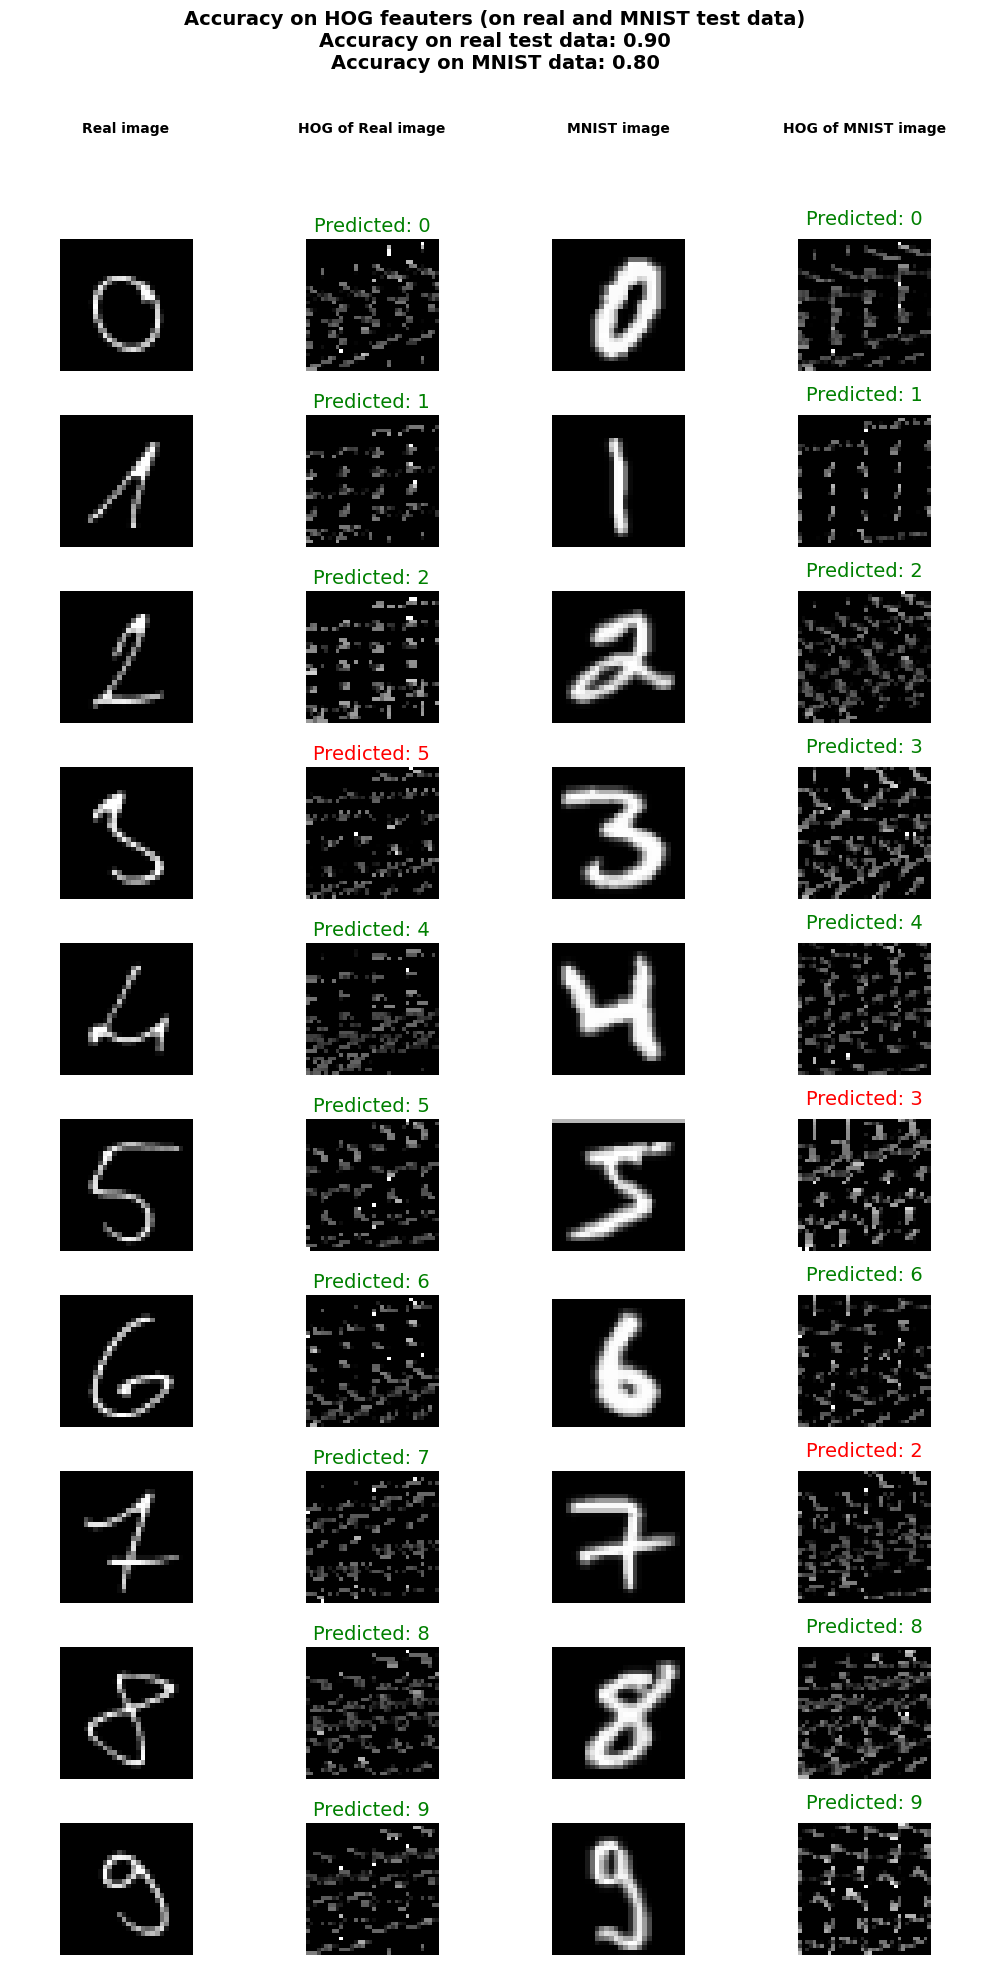

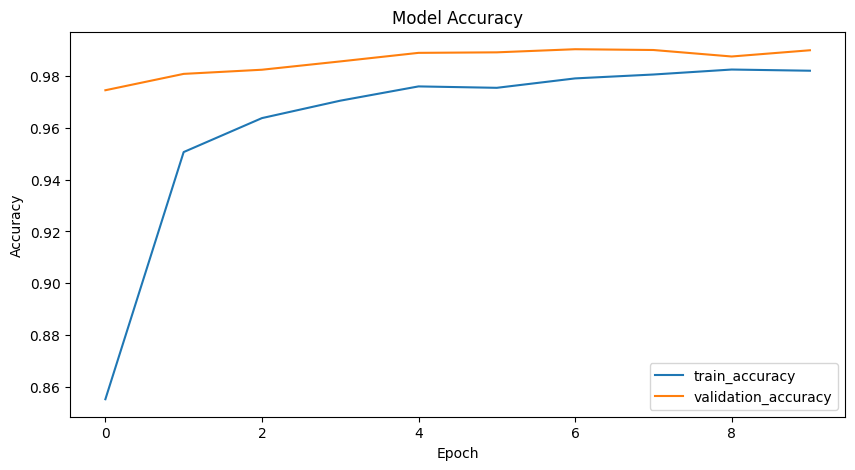

In [84]:
from skimage.feature import hog

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], pixel_h, pixel_w, 1)
x_test = x_test.reshape(x_test.shape[0], pixel_h, pixel_w, 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Apply HOG
def get_HoG_all_image(X):
    x_extract=[]
    for i in range(len(X)):
        fd = hog(X[i], orientations=9, pixels_per_cell=(4, 4),
                	cells_per_block=(2, 2), visualize=False, transform_sqrt=True, channel_axis=2)
        x_extract.append(fd)
    return np.array(x_extract)

x_train = get_HoG_all_image(x_train)
x_test = get_HoG_all_image(x_test)

x_train = x_train.reshape(-1, 36, 36, 1)
x_test = x_test.reshape(-1, 36, 36, 1)

split_idx = int(len(x_train) * (1 - VALIDATION_SPLIT))
x_train, x_val = x_train[:split_idx], x_train[split_idx:]
y_train, y_val = y_train[:split_idx], y_train[split_idx:]

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train,y_train,validation_data=(x_test,y_test),
          batch_size=64,
          shuffle=True,
          epochs=15)

plt.figure(figsize=(10, 20)) 
gs = plt.GridSpec(11, 4)
num_of_correct_real = 0
num_of_correct_mnist = 0
    
# Column headers
for col, title in enumerate(["Real image", "HOG of Real image", "MNIST image", "HOG of MNIST image"]):
    ax = plt.subplot(gs[0, col])
    ax.text(0.5, 0.5, title, ha='center', va='center', fontsize=10, weight='bold')
    ax.axis('off')

# For each digit 0-9
for i in range(10):
    # REAL HANDWRITING
    img_real = transform_digit_to_mnist_like(f'test_numbers_real/{i}.png')
    hog_real = get_HoG_all_image(img_real.reshape(1, 28, 28, 1)/255).reshape(36, 36)
    pred_real = model.predict(hog_real.reshape(1, 36, 36, 1), verbose=0).argmax()
    
    # Original
    ax = plt.subplot(gs[i+1, 0])
    ax.imshow(img_real, cmap='gray')
    ax.axis('off')
    
    # HOG
    ax = plt.subplot(gs[i+1, 1])
    ax.imshow(hog_real, cmap='gray')

    status_color = 'green' if i == pred_real else 'red'
    ax.set_title(f"Predicted: {pred_real}", pad=5, fontsize=14, color=f'{status_color}')
    ax.axis('off')

    if i == pred_real:
        num_of_correct_real += 1
    
    # MNIST DIGIT
    img_mnist = keras.preprocessing.image.load_img(
        f'test_numbers_mnist/{i}.png', 
        target_size=(28, 28), 
        color_mode="grayscale"
    )
    img_mnist_array = keras.preprocessing.image.img_to_array(img_mnist)
    hog_mnist = get_HoG_all_image(img_mnist_array.reshape(1, 28, 28, 1)/255).reshape(36, 36)
    pred_mnist = model.predict(hog_mnist.reshape(1, 36, 36, 1), verbose=0).argmax()
    
    # Original
    ax = plt.subplot(gs[i+1, 2])
    ax.imshow(img_mnist, cmap='gray')
    ax.axis('off')
    
    # HOG
    ax = plt.subplot(gs[i+1, 3])
    ax.imshow(hog_mnist, cmap='gray')
    status_color = 'green' if i == pred_mnist else 'red'
    ax.set_title(f"Predicted: {pred_mnist}", pad=10, fontsize=14, color=f'{status_color}')
    ax.axis('off')

    if i == pred_mnist:
        num_of_correct_mnist += 1
plt.suptitle(f'Accuracy on HOG feauters (on real and MNIST test data)\nAccuracy on real test data: {num_of_correct_real / 10:.2f}\nAccuracy on MNIST data: {num_of_correct_mnist / 10:.2f}', 
            y=0.98, fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# Plot training history (keep your existing code)
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()